# Visualização gráfica de dados

## Intercalando *matplotlib* e *pandas*

As *Series* e os *DataFrames* possuem um método `plot` de visualização gráfica construído com base no *matplotlib* que contempla diversos tipos de gráficos, incluindo gráficos estatísticos.

Ao utilizar o método `plot` em uma *Series* ou *DataFrame*, não haverá necessidade de importar o `matplotlib.pyplot`, uma vez que as funções e métodos utilizados já foram importados pelo *pandas*.

Primeiramente veremos construções gráficas com base no método `plot`. Vamos começar importando e construindo os *DataFrames* a serem utilizados.

In [1]:
import numpy as np
import pandas as pd

In [2]:
serie_Idade = pd.Series({'Ana':20, 'João': 19, 'Maria': 21, 'Pedro': 22, 'Túlio': 20}, name="Idade")
serie_Peso = pd.Series({'Ana':55, 'João': 80, 'Maria': 62, 'Pedro': 67, 'Túlio': 73}, name="Peso")
serie_Altura = pd.Series({'Ana':162, 'João': 178, 'Maria': 162, 'Pedro': 165, 'Túlio': 171}, name="Altura")

In [3]:
dicionario_series_exemplo = {'Idade': serie_Idade, 'Peso': serie_Peso, 'Altura': serie_Altura}

In [4]:
df_dict_series = pd.DataFrame(dicionario_series_exemplo);df_dict_series

,Idade,Peso,Altura
Ana,20,55,162
João,19,80,178
Maria,21,62,162
Pedro,22,67,165
Túlio,20,73,171


In [5]:
df_exemplo = pd.read_csv('data/exemplo_data.csv', index_col=0);df_exemplo

,coluna_1,coluna_2
2020-01-01,-0.416092,1.810364
2020-01-02,-0.137970,2.578520
2020-01-03,0.575827,0.060866
2020-01-04,-0.017367,1.299587
2020-01-05,1.384279,-0.381732
2020-01-06,0.549706,-1.308789
2020-01-07,-0.282296,-1.688979
2020-01-08,-0.989730,-0.028121
2020-01-09,0.275582,-0.177659
2020-01-10,0.685132,0.502535


In [6]:
df_exemplo['coluna_3'] = pd.Series([1,2,3,4,5,6,7,8,np.nan,np.nan],index=df_exemplo.index);df_exemplo

,coluna_1,coluna_2,coluna_3
2020-01-01,-0.416092,1.810364,1.0
2020-01-02,-0.137970,2.578520,2.0
2020-01-03,0.575827,0.060866,3.0
2020-01-04,-0.017367,1.299587,4.0
2020-01-05,1.384279,-0.381732,5.0
2020-01-06,0.549706,-1.308789,6.0
2020-01-07,-0.282296,-1.688979,7.0
2020-01-08,-0.989730,-0.028121,8.0
2020-01-09,0.275582,-0.177659,NaN
2020-01-10,0.685132,0.502535,NaN


In [7]:
covid_PB = pd.read_csv('https://superset.plataformatarget.com.br/superset/explore_json/?form_data=%7B%22slice_id%22%3A1550%7D&csv=true', 
                             sep=',', index_col=0)

In [8]:
covid_PB.head()

,casosAcumulados,casosNovos,descartados,recuperados,obitosAcumulados,obitosNovos,Letalidade
data,,,,,,,
2021-02-09,199706,971,237369,152779,4171,13,0.0209
2021-02-08,198735,611,237189,151879,4158,12,0.0209
2021-02-07,198124,664,237072,151535,4146,11,0.0209
2021-02-06,197460,918,236774,150175,4135,12,0.0209
2021-02-05,196542,1060,236216,150169,4123,13,0.0210


In [9]:
covid_BR = pd.read_excel("data/HIST_PAINEL_COVIDBR_18jul2020.xlsx")

In [10]:
covid_BR.head()

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN,NaN
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN,NaN
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN,NaN
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN,NaN
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN,NaN


### Gráfico de Linhas

 O gráfico de linhas é formado por pontos no plano a partir de duas variáveis e, em seguida, estes pontos são ligados por segmentos de retas. Este é o gráfico padrão construído pelo método `plot`. Para construí-lo basta "chamar" o método `plot` sem argumentos adicionais.

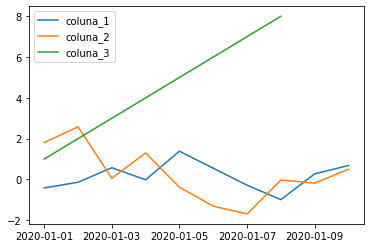

In [11]:
df_exemplo.plot();

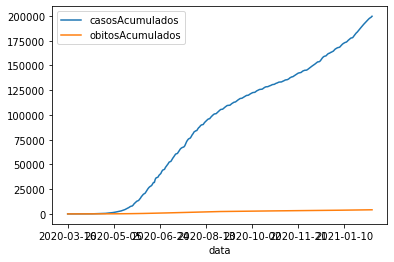

In [12]:
covid_PB_casos_obitos = covid_PB[['casosAcumulados', 'obitosAcumulados']].sort_index()
covid_PB_casos_obitos.plot();

**Obs.**: Note que houve uma sobreposição dos valores no eixo *x*.

Se convertermos o *index* para data, isto será corrigido, pois se o tipo do dado for data, o pandas implementa o método `autofmt_xdate` que corrige a sobreposição:

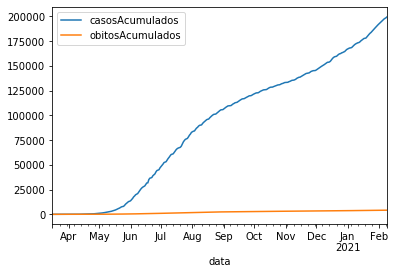

In [13]:
covid_PB.index = pd.to_datetime(covid_PB.index)
covid_PB_casos_obitos = covid_PB[['casosAcumulados', 'obitosAcumulados']].sort_index()
covid_PB_casos_obitos.plot();

In [14]:
covid_regioes = pd.DataFrame()

regioes = covid_BR.query('regiao != "Brasil"')['regiao'].drop_duplicates().array

for regiao in regioes:
    temp_series = covid_BR.set_index('data').query('regiao == @regiao')['obitosAcumulado'].groupby('data').sum()/2
    #Obs.: Utilizamos @ na frente do nome da variável para utilizar o valor da variável no query.
    temp_series.name = 'obitos_' + regiao
    covid_regioes = pd.concat([covid_regioes, temp_series], axis=1)
    
covid_regioes.index = pd.to_datetime(covid_regioes.index)
covid_regioes

,obitos_Norte,obitos_Nordeste,obitos_Sudeste,obitos_Sul,obitos_Centro-Oeste
data,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-14,10628.0,23925.0,33718.0,2740.0,3122.0
2020-07-15,10693.0,24272.0,34246.0,2870.0,3285.0
2020-07-16,10790.0,24645.0,34857.0,2975.0,3421.0


O argumento `figsize` permite inserir uma tupla para definir as dimensões horizontais e verticais, respectivamente, em polegadas.

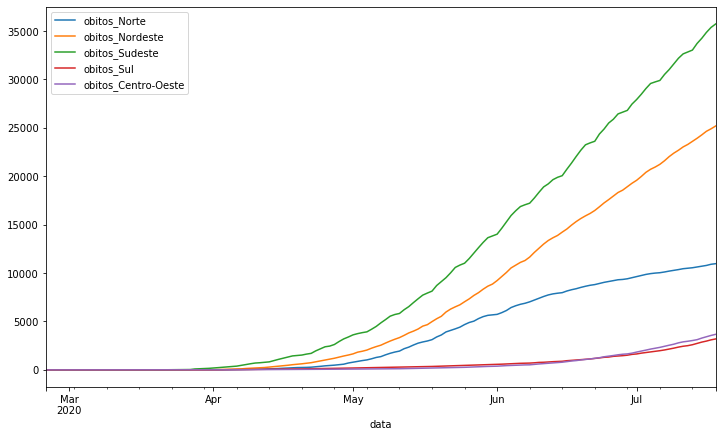

In [15]:
covid_regioes.plot(figsize=(12,7));

### Gráfico de Colunas

O gráfico de colunas é formado por uma coleção de colunas, com bases de mesmo comprimento, e igualmente espaçados. O eixo horizontal do gráfico consiste das diferentes categorias consideradas, e o eixo vertical é proporcional ao valor do dado. Podemos criar gráficos em colunas utilizando o argument `kind` do método `plot`. Assim, para criar um gráfico de colunas, basta utilizar `plot(kind = 'bar')`.  Também podemos criar estes gráficos utilizando o método `plot.bar()`. As duas formas são equivalentes.

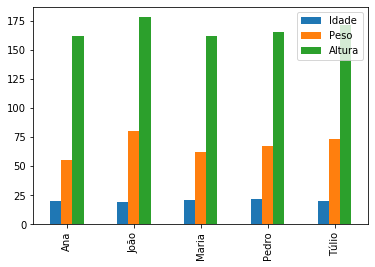

In [16]:
df_dict_series.plot(kind = 'bar');

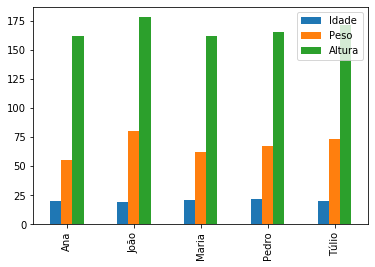

In [17]:
df_dict_series.plot.bar();

Também podemos "empilhar" as barras para cada *index* utilizando o argumento `stacked=True`:

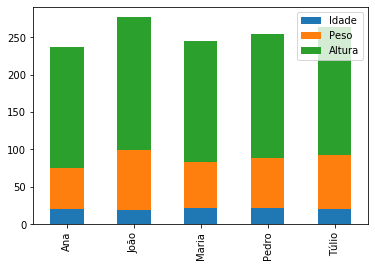

In [18]:
df_dict_series.plot.bar(stacked=True);

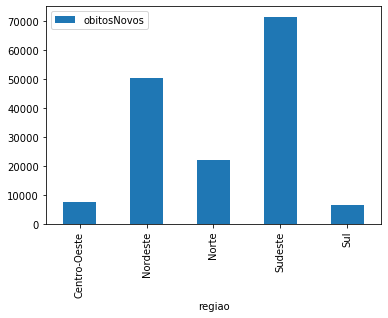

In [19]:
covid_Regioes = covid_BR[['regiao','obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')
covid_Regioes.plot.bar();

Vamos agora considerar os *óbitos* como `index`:

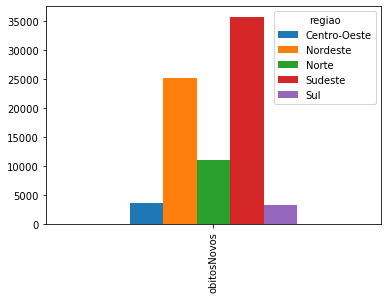

In [20]:
covid_Regioes_casos_obitos = covid_BR[['regiao',
                                       'obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2
covid_Regioes_casos_obitos.transpose().plot.bar();

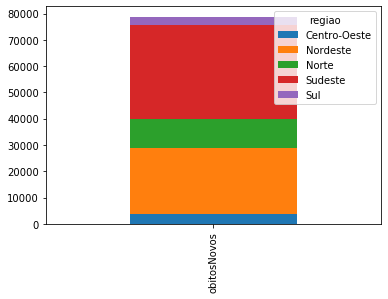

In [21]:
covid_Regioes_casos_obitos.transpose().plot.bar(stacked=True);

### Gráfico de Barras

O gráfico de barras é construído da mesma forma do gráfico em colunas, entretanto, muda-se a orientação. Neste caso, o eixo horizontal do gráfico é proporcional ao valor do dado, e o eixo vertical consiste das diferentes categorias consideradas. Para criar um gráfico de barras, basta utilizar `plot(kind = 'barh')`.  Também podemos criar estes gráficos utilizando o método `plot.barh()`. As duas formas são equivalentes.

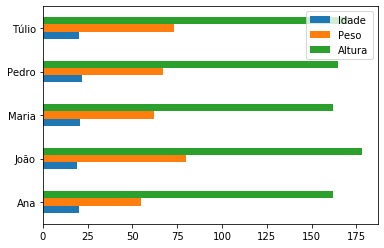

In [22]:
df_dict_series.plot(kind = 'barh');

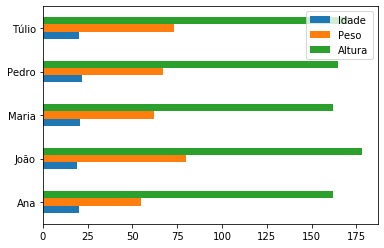

In [23]:
df_dict_series.plot.barh();

Também podemos "empilhar" as barras para cada índice utilizando o argumento `stacked=True`:

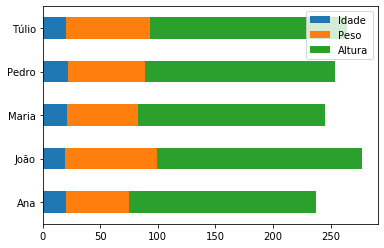

In [24]:
df_dict_series.plot.barh(stacked=True);

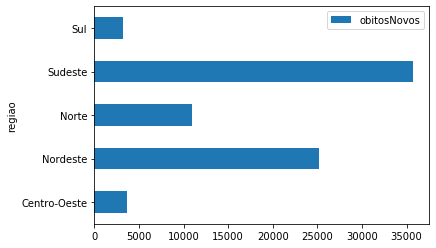

In [25]:
covid_Regioes = covid_BR[['regiao','obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2
covid_Regioes.plot.barh();

Vamos agora considerar as *óbitos* como `index`:

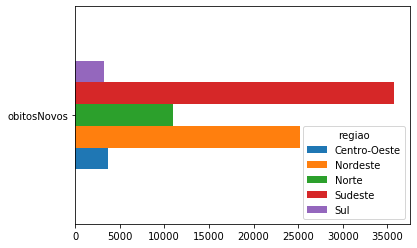

In [26]:
covid_Regioes_casos_obitos = covid_BR[['regiao',
                                       'obitosNovos']].groupby('regiao').sum().query('regiao != "Brasil"')/2
covid_Regioes_casos_obitos.transpose().plot.barh();

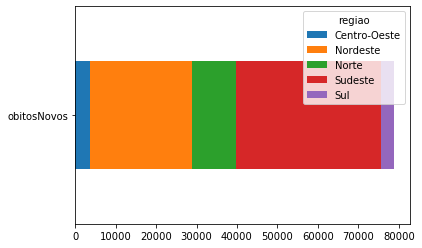

In [27]:
covid_Regioes_casos_obitos.transpose().plot.barh(stacked=True);

### Gráfico de Setores

O gráfico de setores, que também é popularmente conhecido como **gráfico pizza**, é um gráfico em que um círculo é dividido em setores, onde cada setor representa uma categoria considerada pelo conjunto de dados, e os ângulos dos setores são proporcionais aos valores dos dados em cada categoria. 

Podemos criar gráficos de setores utilizando o argumento `kind` do método `plot`. Assim, para criar um gráfico de setores, basta utilizar `plot(kind = 'pie')`. Também podemos criar estes gráficos utilizando o método `plot.pie()`. As duas formas são equivalentes. Para este gráfico é conveniente utilizar o argumento `figsize` já que o tamanho padrão tende a ser muito pequeno.

Além disso, tipicamente é necessário acrescentar `subplots=True` para a criação de uma "pizza" para cada coluna numérica.
Em uma *Series* do *pandas*, não é necessário o argumento `subplots=True`.

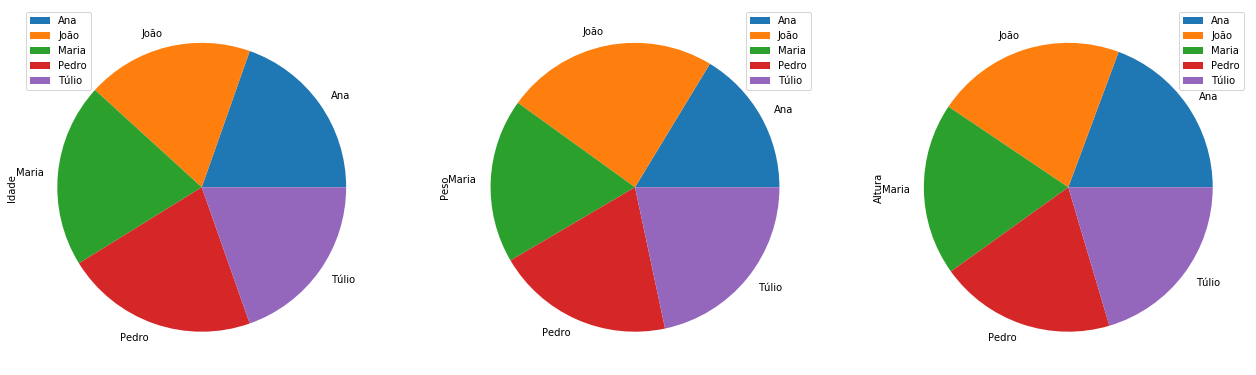

In [28]:
df_dict_series.plot.pie(subplots=True,figsize=(22,7));

Aqui temos um gráfico acerca da mortalidade de COVID-19 através das diferentes regiões do Brasil.

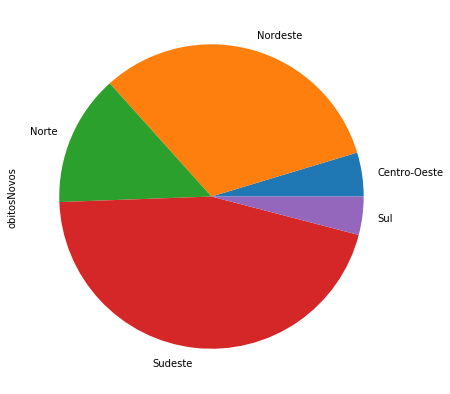

In [29]:
covid_Regioes_casos_obitos.obitosNovos.plot.pie(figsize=(7,7));

### Gráfico de Dispersão

O gráfico de dispersão representa dados de duas (ou mais) variáveis utilizando as coordenadas cartesianas para exibir valores de um conjunto de dados. Os dados são exibidos como uma coleção de pontos, cada um com o valor de uma variável determinando a posição no eixo horizontal e o valor da outra variável determinando a posição no eixo vertical. Quando há mais de duas variáveis, utilizam-se recursos adicionais como tamanhos dos pontos e/ou cores dos pontos.

Para criar um gráfico de dispersão, basta utilizar `plot(kind = 'scatter')`. Também podemos criar estes gráficos utilizando o método `plot.scatter()`. As duas formas são equivalentes. 

Neste caso, devemos incluir dois argumentos: `x` e `y`, representando a abscissa e a ordenada, respectivamente. Para utilizar o *index* como eixo `x` é preciso que o *index* seja uma coluna, para tanto pode-se utilizar o método `reset_index()`. Assim, como nos outros métodos, podemos utilizar o argumento `rot` para rotacionar os rótulos do eixo `x`.

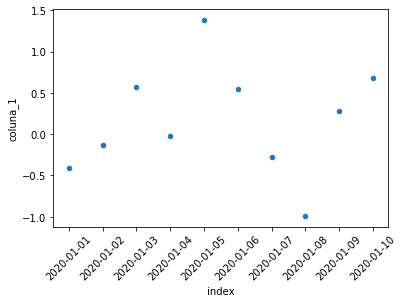

In [30]:
df_exemplo.reset_index().plot.scatter(x = 'index', y ='coluna_1' , rot = 45);

Podemos utilizar o argumento **s** para inserir o *tamanho* como uma variável gráfica (lembrando que o tamanho deve ser positivo):

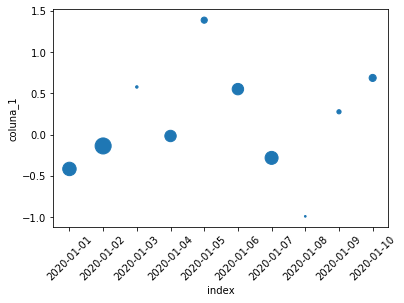

In [31]:
df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_1', rot = 45, s = np.abs(df_exemplo['coluna_2'])*100);

Podemos utilizar o argumento `c` para definir uma variável inserir a *cor* como uma variável gráfica:

In [32]:
covid_PB_casos_obitos = covid_PB[['obitosNovos', 'casosNovos']].sort_index()

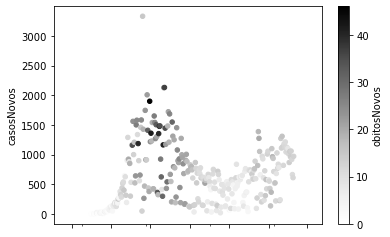

In [33]:
covid_PB_casos_obitos.reset_index().plot.scatter(x = 'data', y = 'casosNovos', c = 'obitosNovos');

O tamanho e cores também podem ser fixados para fins estéticos:

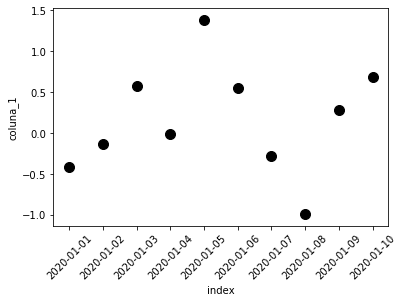

In [34]:
df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_1', rot = 45, c = 'black', s = 100);

Para criar múltiplos gráficos de dispersão sobrepostos, utilizamos o argumento `ax`.

Para definir o rótulo do eixo `y` utilizamos: `ax.set_ylabel("Valor")`.

Para definir o rótulo do eixo `x` utilizamos: `ax.set_xlabel("Data")`.

Text(0.5, 0, 'Data')

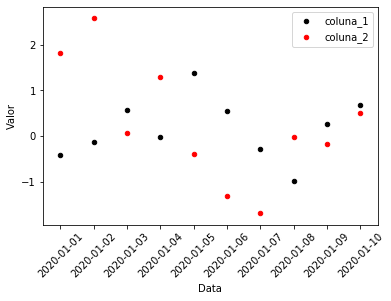

In [35]:
ax = df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_1', label = 'coluna_1', 
                                           color = 'black', rot = 45)
df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_2', label = 'coluna_2', color = 'red',
                                      rot = 45, ax = ax)

ax.set_ylabel("Valor")
ax.set_xlabel("Data")

Para sobrepor mais de dois gráficos, basta repetir o método anterior mais de uma vez:

Text(0.5, 0, 'Data')

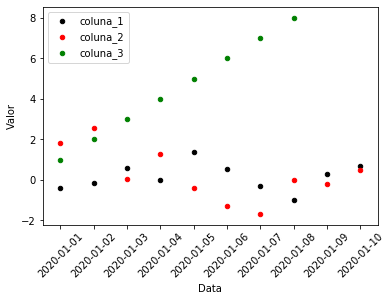

In [36]:
ax = df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_1', label = 'coluna_1', 
                                           color = 'black', rot = 45)
df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_2', label = 'coluna_2', color = 'red',
                                      rot = 45, ax = ax)
df_exemplo.reset_index().plot.scatter(x = 'index', y = 'coluna_3', label = 'coluna_3', color = 'green',
                                      rot = 45, ax = ax)

ax.set_ylabel("Valor")
ax.set_xlabel("Data")

### Histograma

O histograma é formado por uma justaposição de retângulos de bases com o mesmo comprimento. O comprimento da base é justamente a amplitude do intervalo e a altura do retângulo é dada pela frequência absoluta do intervalo. O histograma é a representação gráfica de *distribuição de frequência*.

Para criar um histograma, basta utilizar `plot(kind = 'hist')`. Também podemos criar histogramas utilizando o método `plot.hist()`. As duas formas são equivalentes.

Um parâmetro comumente utilizado é `alpha` que define a transparência dos histogramas e é dado por um número entre 0 e 1. Outro parâmetro comumente utilizado é `bins` que determina o número de intervalos a serem considerados. Se quisermos que os histogramas sejam "plotados" separadamente, utilizamos o método `hist()` diretamente.

In [37]:
covid_BR_regioes = covid_BR.copy().set_index('data').query('regiao != "Brasil"')
covid_BR_regioes = covid_BR_regioes[['regiao','obitosNovos']].groupby(['regiao','data']).sum()/2

covid_BR_reg = pd.DataFrame()

for regiao in covid_BR_regioes.index.get_level_values(0).drop_duplicates():
    covid_BR_reg = pd.concat([covid_BR_reg, covid_BR_regioes.loc[regiao]], 
                             axis=1).rename({'obitosNovos':'obitos_'+regiao},axis=1)
    
covid_BR_reg

,obitos_Centro-Oeste,obitos_Nordeste,obitos_Norte,obitos_Sudeste,obitos_Sul
data,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0
2020-02-26,0.0,0.0,0.0,0.0,0.0
2020-02-27,0.0,0.0,0.0,0.0,0.0
2020-02-28,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-14,88.0,315.0,76.0,682.0,139.0
2020-07-15,163.0,347.0,65.0,528.0,130.0
2020-07-16,136.0,373.0,97.0,611.0,105.0


In [38]:
covid_BR_NE = covid_BR.set_index('data').query('regiao == "Nordeste"')['obitosNovos'].groupby('data').sum()/2
covid_BR_NE.name = 'obitos_NE'

covid_BR_SE = covid_BR.set_index('data').query('regiao == "Sudeste"')['obitosNovos'].groupby('data').sum()/2
covid_BR_SE.name = 'obitos_SE'

covid_BR_NE_SE = pd.concat([covid_BR_NE,covid_BR_SE], axis=1)
covid_BR_NE_SE

,obitos_NE,obitos_SE
data,,
2020-02-25,0.0,0.0
2020-02-26,0.0,0.0
2020-02-27,0.0,0.0
2020-02-28,0.0,0.0
2020-02-29,0.0,0.0
...,...,...
2020-07-14,315.0,682.0
2020-07-15,347.0,528.0
2020-07-16,373.0,611.0


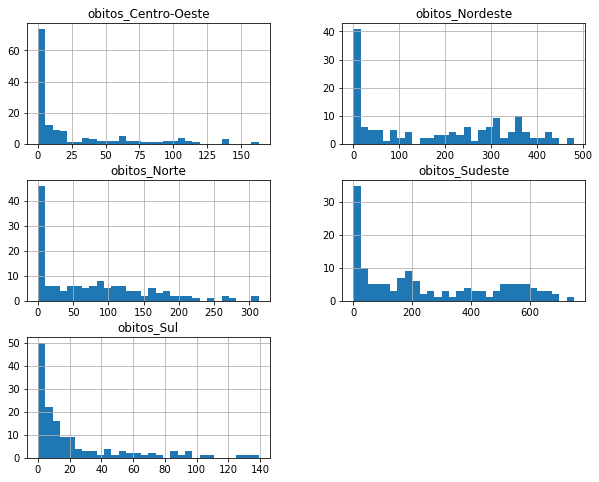

In [39]:
covid_BR_reg.hist(figsize = (10,8), bins=30);

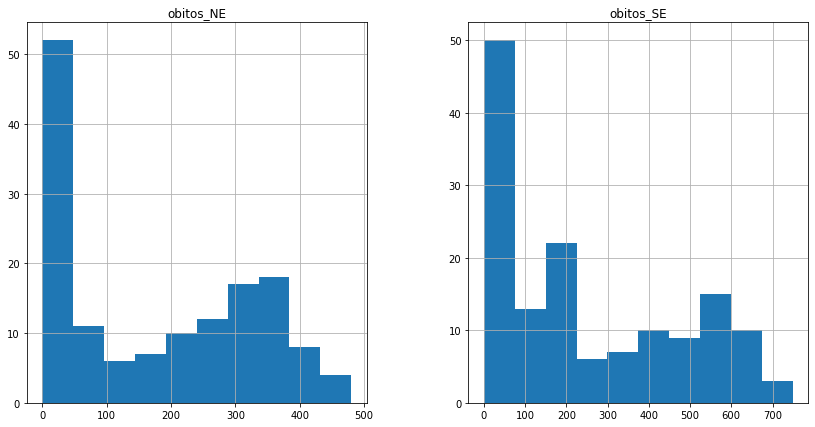

In [40]:
covid_BR_NE_SE.hist(figsize = (14,7));

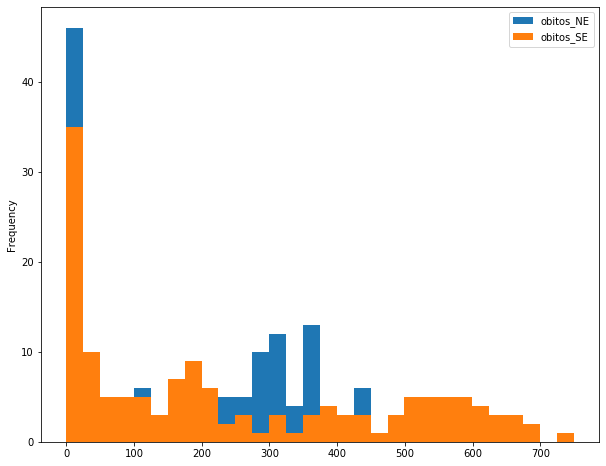

In [41]:
covid_BR_NE_SE.plot.hist(bins=30, figsize = (10,8));

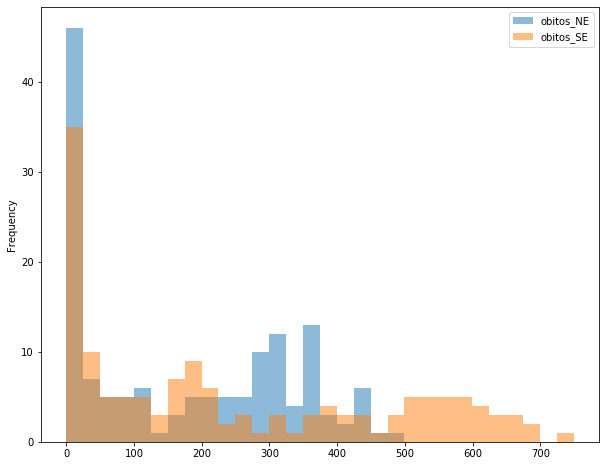

In [42]:
covid_BR_NE_SE.plot.hist(alpha=0.5, bins=30, figsize = (10,8));

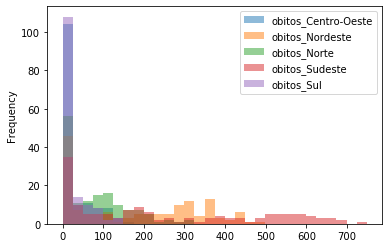

In [43]:
covid_BR_reg.plot.hist(alpha=0.5, bins=30);

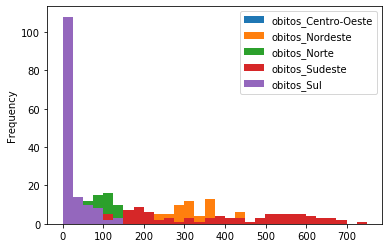

In [44]:
covid_BR_reg.plot.hist(bins=30);

### BoxPlot

O boxplot representa a variação dos dados de uma variável, por meio de uma caixa, onde são apresentados os *quartis*, e retas apresentando os limites inferior e superior dos dados. Os valores discrepantes ou *outliers* são plotados como pontos individuais.

Para criar um BoxPlot, basta utilizar `plot(kind = 'box')`. Também podemos criar BoxPlots utilizando o método `plot.box()`. As duas formas são equivalentes. O argumento `vert=False` faz com que os BoxPlots fiquem horizontais.

In [45]:
covid_regioes_obitosDiarios = pd.DataFrame()

regioes = covid_BR.query('regiao != "Brasil"')['regiao'].drop_duplicates().array

for regiao in regioes:
    temp_series = covid_BR.set_index('data').query('regiao == @regiao')['obitosNovos'].groupby('data').sum()/2
    #Obs.: Utilizamos @ na frente do nome da variável para utilizar o valor da variável no query.
    temp_series.name = 'obitos_' + regiao
    covid_regioes_obitosDiarios = pd.concat([covid_regioes_obitosDiarios, temp_series], axis=1)
    
covid_regioes_obitosDiarios.index = pd.to_datetime(covid_regioes_obitosDiarios.index)
covid_regioes_obitosDiarios.tail()


,obitos_Norte,obitos_Nordeste,obitos_Sudeste,obitos_Sul,obitos_Centro-Oeste
data,,,,,
2020-07-14,76.0,315.0,682.0,139.0,88.0
2020-07-15,65.0,347.0,528.0,130.0,163.0
2020-07-16,97.0,373.0,611.0,105.0,136.0
2020-07-17,121.0,257.0,517.0,129.0,139.0
2020-07-18,61.0,292.0,358.0,95.0,115.0


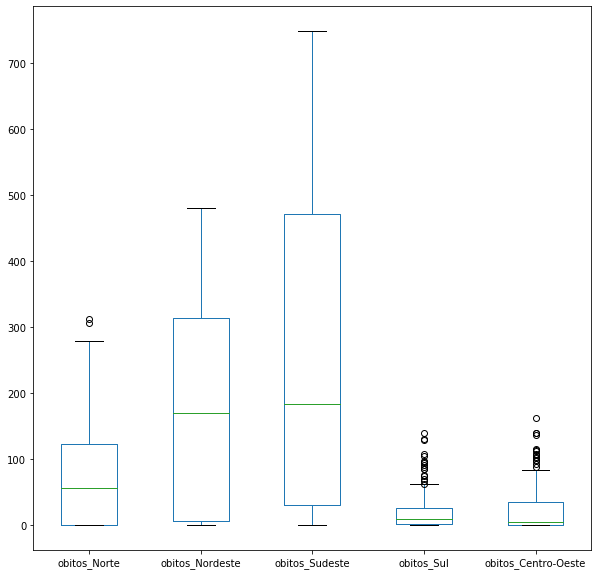

In [46]:
covid_regioes_obitosDiarios.plot.box(figsize=(10,10));

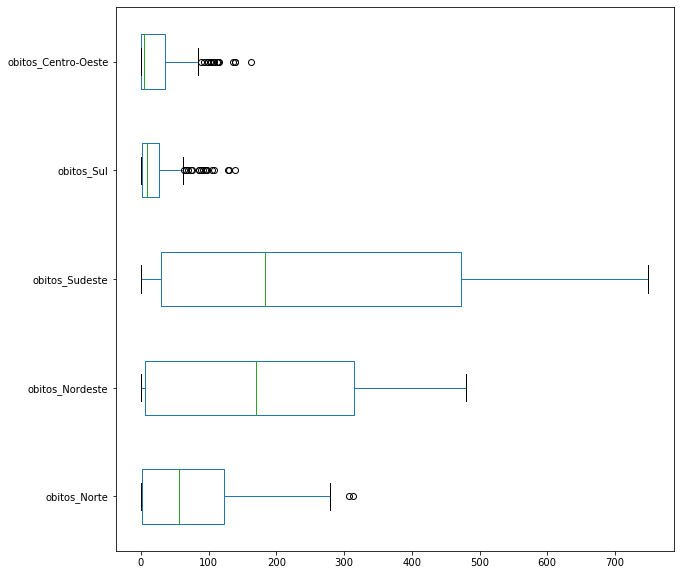

In [47]:
covid_regioes_obitosDiarios.plot.box(figsize=(10,10), vert=False);